In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
L = 1 #duzina zice 1 m
Nx = 101  #broj segmenata zice
Nt = 10000  #broj vremenskih intervala
t = 0.5 #broj sekundi
dt = t/Nt  #trajanje jednog vremenskog intervala
dx = L/Nx  #duzina jednog segmenta zice

mu = 0.03                                              # gustina zice
ten = 50.                                                  # napetost zice
c = np.sqrt(ten/mu)                                # brzina talasa u zici
cp = dt/dx
cp = cp*cp # 
cc =  c*c
konst = cc*cp

In [59]:
# Rezultate snimamo u matricu koja na pocetku ima samo jedan red (vrijeme=0) i Nx kolona
# svaki novi red koji prosirimo predstavlja novi trenutak (t+dt)
Y = np.zeros((1,Nx))

In [60]:
# za svaku tacku zice, potrebno je imati 3 vremenska trenutka, sadasnji j=1, buduci (j+1=2) i prosli (j-1=0)
YY = np. zeros((3,Nx))

# TRENUTAK t=0 ("prosli")
for i in range(0, 81):
    YY[0, i] = 0.00125*i          # Pocetni uslovi: zica zategnuta u jednoj tacki
for i in range (81, 101):                           # prvi dio zice
    YY[0, i] = 0.1 - 0.005*(i - 80)                 # drugi dio zice

YY[:,0] = 0                  #krajevi zice fiksirani/ne osciluju
YY[:,-1] = 0


In [61]:
# Trenutak t=dt ("sadasnji")
for i in range(1,100):
    YY[1,i] = YY[0,i] + 0.5*cc*cp*(YY[1,i+1]+YY[0,i-1]-2*YY[0,i])

In [62]:
# dodamo dva trenutka (prvi i drugi) matrici u koju snimamo
Y[0] = YY[0]  #nule zamijenimo sa pocetnim vrijednostima (j=0)
Y = np.append(Y,[YY[1]], axis=0) #dodajemo trenutak (j=1)

In [63]:
# sada racunamo u narednom trenutku vremena, za sve tacke zice:
for k in range(Nt-3):
    for i in range(1,100):
        YY[2,i] = 2*YY[1,i] - YY[0,i] + konst*(YY[1,i+1] + YY[1,i-1]-2*YY[1,i])
        
    Y = np.append(Y, [YY[2]], axis=0)  #dodajemo trenutak j=2
    
    #update sadasnjeg i proslog trenutka (j=0, j=1)
    YY[0] = YY[1]    
    YY[1] = YY[2]

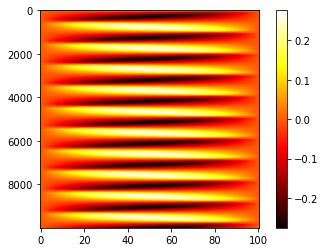

In [64]:
plt.imshow(Y, aspect=0.01, cmap ='hot')
plt.colorbar()

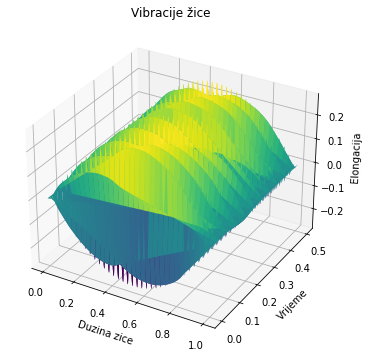

In [65]:
from mpl_toolkits.mplot3d import Axes3D
aX = np.linspace(0,1,101)
aY = np.linspace(0,t,Nt-1)
xv,yv = np.meshgrid(aX,aY)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
dem3d=ax.plot_surface(xv,yv,Y,cmap='viridis', linewidth=1)
#dem3d=ax.plot_wireframe(xv,yv,Yt, color='b') 
ax.set_title('Vibracije žice')
ax.set_zlabel('Elongacija')
ax.set_ylabel('Vrijeme')
ax.set_xlabel('Duzina zice')
plt.show()


In [66]:
"""
Animacija zice
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
#import matplotlib.animation as animation
from IPython import display 
fig, ax = plt.subplots()
ax.set_ylim([-0.5,0.5])

#x = np.arange(0, 2*np.pi, 0.01

line, = ax.plot(aX, Yt[0])


def animate(i):
    line.set_ydata(Yt[i])  # update the data
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(aX, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, 5000, 
                              interval=25, blit=True)
video = ani.to_html5_video() 
  
# embedding for the video 
html = display.HTML(video) 
  
# draw the animation 
display.display(html) 
plt.close() 